<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [72]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [73]:
shd = pd.read_csv('./datasets/sacramento_real_estate_transactions.csv')

In [74]:
shd.head(1)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**


_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues._

In [75]:
shd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [76]:
shd.shape

(985, 12)

In [77]:
sac_csv.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [95]:
#find unique values to see if there are any abnormalities
# https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/

# shd['zip'].unique()
shd['sq__ft'].value_counts().head()

0       171
1120      8
795       6
1410      5
1039      5
Name: sq__ft, dtype: int64

In [79]:
#one state named AC, change it to CA
shd.at[703, 'state']='CA'

In [84]:
#sq__ft is negative, fix that
shd.at[703, 'sq__ft']=984

In [85]:
#price is negative, fix that
shd.at[703, 'price']=210944

In [86]:
#check work
shd.iloc[703]

street                   1900 DANBROOK DR
city                           SACRAMENTO
zip                                 95835
state                                  CA
beds                                    1
baths                                   1
sq__ft                                984
type                                Condo
sale_date    Fri May 16 00:00:00 EDT 2008
price                              210944
latitude                         -121.503
longitude                         38.6684
Name: 703, dtype: object

In [101]:
# drop sq__Ft=0

shd = shd[shd.sq__ft != 0]
shd['sq__ft'].value_counts()

1120    8
795     6
1080    5
1410    5
1039    5
1329    4
960     4
1104    4
1320    4
904     4
1152    4
1638    4
1144    4
1127    3
796     3
1082    3
1139    3
1776    3
1520    3
1477    3
1089    3
722     3
1590    3
924     3
1188    3
1578    3
1380    3
1302    3
1358    3
888     3
1174    3
1800    3
1280    3
2494    3
1448    3
1269    3
1040    3
2724    3
1450    3
1416    3
1266    2
1265    2
1264    2
2846    2
1176    2
1177    2
1328    2
1574    2
1182    2
1262    2
2295    2
1284    2
800     2
1685    2
1830    2
810     2
1555    2
1843    2
1650    2
1341    2
1851    2
1676    2
2367    2
1857    2
834     2
836     2
840     2
1289    2
1258    2
1304    2
2280    2
1715    2
2258    2
1240    2
1616    2
2212    2
1232    2
1300    2
2484    2
1248    2
1032    2
1436    2
1310    2
1740    2
2372    2
1112    2
1596    2
1207    2
1595    2
1204    2
1202    2
1624    2
1250    2
1253    2
1876    2
1627    2
1587    2
1582    2
1690    2
1580    2


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.**

In [102]:
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

#### Variables to consider:
1) number of beds// var = beds

2) number of baths// var = baths

3) sq__ft// var = sq__ft

4) zip // var = zip

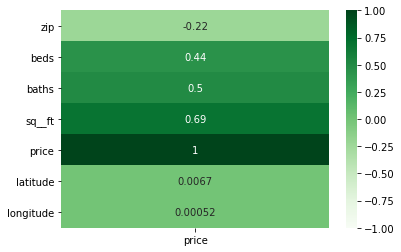

In [111]:
# Plot all against price - adapted from DSIR-Lancelot/2.02-lesson-eda

sns.heatmap(shd.corr()[['price']], annot=True, cmap='Greens', vmin=-1, vmax=1);

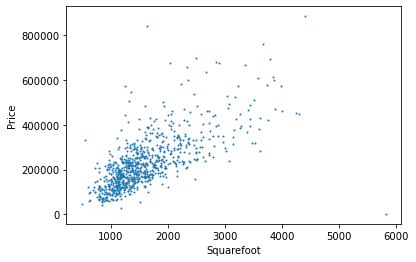

In [113]:
# Plot square footage vs. price
plt.scatter(x=shd['sq__ft'], y=shd['price'], s=1)
plt.xlabel('Squarefoot')
plt.ylabel('Price');

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

### 5. Write a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

### 6. Interpret the intercept and the slope.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.


### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them.

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable (either one we created before or a new one).

Before you construct your model, don't forget to load in the statsmodels API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [ ]:
# convert this cell to markdown to provide your answer

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met for your model, and explain why.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.

Then adjust your model (e.g. by adding or taking away features) to see how the metrics change.

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?